# Aula 08 - Pipeline de Machine Learning - Revisão

Nesta aula vamos rever as etapas do pipeline de machine learning utilizando o `sklearn` (veja [o site](https://scikit-learn.org/stable/)). Novamente, vamos nos concentrar nos métodos já vistos em sala: 

- **KNN**: supervisionado, para _classificação_
- **K-means**: não-supervisionado, para _clusterização_


In [33]:
import warnings
warnings.filterwarnings('ignore')

# Importando a biblioteca para leitura dos dados
import pandas as pd

# Importando função para separar o dataset em TREINO e TESTE
from sklearn.model_selection import train_test_split 

# Importando as classes do sklearn para padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importando os construtores dos modelos 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Importando as métricas a serem utilizadas
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importando bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## O dataset - Imóveis em SP

Nossas análises partirão da mesma base, disponível no Kaggle: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019 

O arquivo é um csv, disponível neste endereço: https://tinyurl.com/alugueis-sp-df , o qual pode ser lido diretamente pelo Pandas!

In [34]:
imoveis = pd.read_csv('https://tinyurl.com/alugueis-sp-df')
imoveis.head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [35]:
# Tamanho do dataset
imoveis.shape

(13640, 16)

In [36]:
# Infos dos dados
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [37]:
# Descrições estatísticas
imoveis.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [38]:
# Valores únicos
imoveis.nunique()

Price               1881
Condo               1415
Size                 339
Rooms                  8
Toilets                8
Suites                 7
Parking               10
Elevator               2
Furnished              2
Swimming Pool          2
New                    2
District              96
Negotiation Type       2
Property Type          1
Latitude            8405
Longitude           8451
dtype: int64

In [39]:
# Como este imóvel eh tratado? 
imoveis["Negotiation Type"].unique()

array(['rent', 'sale'], dtype=object)

In [40]:
# Filtrando apenas aptos para VENDA! (sale)
mascara = imoveis["Negotiation Type"] == "sale"
mascara

0        False
1        False
2        False
3        False
4        False
         ...  
13635     True
13636     True
13637     True
13638     True
13639     True
Name: Negotiation Type, Length: 13640, dtype: bool

In [41]:
df = imoveis[mascara]

In [42]:
# Tamanho do filtro
df.shape

(6412, 16)

In [43]:
# Pegando informações do preço 
print(df.Price.min())
print(df.Price.max())
print(df.Price.mean())
print(df.Price.median())


42000
10000000
608624.1400499064
380000.0


## Padronizando faixas de valor

Use a função abaixo para criar uma nova coluna chamada `Faixa`, a qual receberá um valor dado por esta coluna baseado no dado da coluna `Price`. 

In [44]:
def pega_faixa(valor):
    if valor <= 200000:
        return "Faixa 1"
    elif 200000 < valor <= 400000:
        return "Faixa 2"
    elif 400000 < valor <= 600000:
        return "Faixa 3"
    elif 600000 < valor <= 800000:
        return "Faixa 4"
    elif 800000 < valor <= 1000000:
        return "Faixa 5"
    elif 1000000 < valor <= 5000000:
        return "Faixa 6"
    else: 
        return "Faixa 7"

In [45]:
df["Faixa"] = df["Price"].apply(pega_faixa)

In [46]:
df.head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,Faixa
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244,Faixa 4
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106,Faixa 6
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594,Faixa 4
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104,Faixa 6
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890,Faixa 6


In [47]:
df["Faixa"].unique()

array(['Faixa 4', 'Faixa 6', 'Faixa 5', 'Faixa 3', 'Faixa 2', 'Faixa 7',
       'Faixa 1'], dtype=object)

## Processo de limpeza

Realize os processos de limpeza adequados:
- remover duplicatas
- remover dados faltantes
- remover colunas não relevantes
- padronizar dados (como vimos na última aula)

In [48]:
# remover duplicatas
df.drop_duplicates(inplace=True)

In [49]:
# remover dados faltantes
df.dropna(inplace=True)

Aqui`Negotiation Type` e `Property Type` possuem o mesmo valor para todas as linhas da coluna, então não agregam informações ao modelo preditivo. Vamos removê-las, e também remover `Latitude` e `Longitude`, que não serão utilizados, pois esta informação está "disfarçada" no `District` que o imóvel está localizado. 

In [52]:
# remover colunas não relevantes
df.nunique()

df.drop(columns=["Negotiation Type", "Property Type", "Latitude", "Longitude"], inplace=True)

In [53]:
df.head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Faixa
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,Faixa 4
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,Faixa 6
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,Faixa 4
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,Faixa 6
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,Faixa 6


### Padronizar dados

A padronização dos dados depende da seleção dos dados, do seu tipo (se eh numérico ou categórico) e da divisão de TREINO/TESTE do conjunto todo. Assim, precisamos fazer uma padronização por problema a ser endereçado. Portanto, faremos um padronização para cada modelagem a seguir. 

## K-means

Ignorando as colunas `Price` e `Faixa` (além das outras que vocês julgaram irrelevantes), ache o **K** ideal para agrupar os apartamentos e avalie (interprete) os clusteres formados.

In [55]:
# Para fazerem divisão de TREINO, TESTE usando 70/30 e semente aleatória = 42
X = df.drop(columns=["Price", "District", "Faixa"])
y = df["Faixa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Nosso dataframe ficou apenas com valores numéricos, logo, não preciso trabalhar com OneHotEncoder, apenas escalar os valores existentes.

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [64]:
# Escolhendo K pelo método da silhueta e do cotovelo 
silhuetas = []
sse_list = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X_train_scaled)
    
    sse_list.append(model.inertia_) # Lista de erros quadráticos médios
    
    score = silhouette_score(X_train_scaled, model.labels_)
    silhuetas.append(score) # Lista dos coeficientes de silhueta 

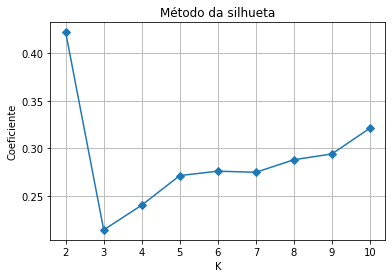

In [65]:
# Plotando o gráfico da silhueta
plt.plot(range(2, 11), silhuetas, marker="D")
plt.grid()
plt.title("Método da silhueta")
plt.xlabel("K")
plt.ylabel("Coeficiente")
plt.show()

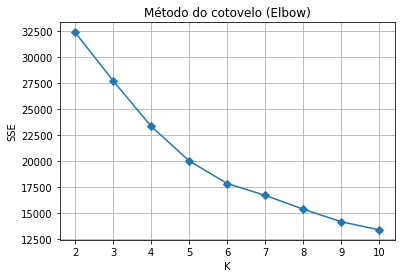

In [66]:
# Plotando o gráfico do cotevelo
plt.plot(range(2, 11), sse_list, marker="D") 
plt.grid()                                   
plt.title("Método do cotovelo (Elbow)")      
plt.xlabel("K")                              
plt.ylabel("SSE")                            
plt.show()      

**RESPOSTA**: observando os 2 métodos, parece que o melhor valor de K ocorre quando `K=10`, pois o gráfico da silhueta mostra um coeficiente com maior valor AO MESMO TEMPO que o erro quadrático médico acumulado do gráfico do cotovelo fica menor. Ainda que a silhueta com melhor coeficiente absoluto esteja com K=2, o erro quadrático médio naquele valor de K é muito alto! 

Vamos ver o que esta clusterização significa.

In [67]:
# Construindo o modelo final com K=10
model = KMeans(n_clusters=10)
model.fit(X_train_scaled)

KMeans(n_clusters=10)

In [73]:
# Salvando os valores de quais clusteres pertencem os aptos do treino:
#   - aptos é um novo DataFrame, sendo uma cópia do dataframe de treino com os valores originais, resetando os índices
#        e recebendo na coluna "Grupo" as atribuições de cada cluster cujos IDs variam de 0 a 9
aptos = X_train.copy().reset_index()
aptos["Grupo"] = model.labels_

In [74]:
aptos.head(5)

,index,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Grupo
0,13197,200,40,2,1,0,1,0,0,1,0,4
1,11754,0,51,2,2,1,1,0,0,0,0,0
2,13539,1350,181,3,4,3,2,0,0,1,0,1
3,13605,650,89,3,2,1,2,1,0,1,0,2
4,6290,0,275,4,5,4,4,1,0,1,0,1


In [80]:
# Este cluster parece de aptos que: 
#    - não são novos (new está como valor max e min == zero!)
#    - não são mobiliados (furnished está com valor máx e min == zero!)
#    - cuja metragem gira em torno de 116m²
#    - possuem em torno de 3 quartos, sendo 2.4 suítes 
aptos[aptos["Grupo"] == 2].describe()

,index,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Grupo
count,548.00000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.0,548.000000,548.0,548.0
mean,8937.95438,959.111314,116.118613,3.016423,2.448905,1.100365,1.932482,0.447080,0.0,0.781022,0.0,2.0
std,2658.72374,620.591032,41.935166,0.379676,0.664549,0.399908,0.495873,0.497646,0.0,0.413932,0.0,0.0
min,4906.00000,0.000000,55.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,2.0
25%,6917.25000,604.000000,89.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.0,1.000000,0.0,2.0
50%,8362.50000,900.000000,104.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.0,1.000000,0.0,2.0
75%,11703.50000,1300.000000,130.000000,3.000000,3.000000,1.000000,2.000000,1.000000,0.0,1.000000,0.0,2.0
max,13637.00000,3500.000000,393.000000,4.000000,5.000000,3.000000,5.000000,1.000000,0.0,1.000000,0.0,2.0


In [83]:
# Este cluster parece de aptos que: 
#    - não são novos (new está como valor max, min e média == zero!)
#    - TODOS são mobiliados (furnished está desvio padrão == zero, e média em 1, logo, todos estão ativos)
#    - cuja metragem gira em torno de 72m²
#    - possuem em torno de 2 quartos, sendo ~1 suíte
aptos[aptos["Grupo"] == 3].describe()

,index,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Grupo
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.0,457.000000,457.0,457.0
mean,8704.225383,593.765864,72.385120,2.247265,1.980306,0.866521,1.330416,0.435449,1.0,0.667396,0.0,3.0
std,2745.844079,428.024281,29.266854,0.680330,0.559650,0.415853,0.560207,0.496359,0.0,0.471662,0.0,0.0
min,4905.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,3.0
25%,6205.000000,350.000000,51.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.0,3.0
50%,7935.000000,524.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.0,3.0
75%,11764.000000,756.000000,83.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.0,1.000000,0.0,3.0
max,13638.000000,2743.000000,280.000000,4.000000,4.000000,2.000000,4.000000,1.000000,1.0,1.000000,0.0,3.0


In [84]:
# Este cluster parece de aptos que: 
#    - são novos (new está como valor min, max e média == 1 e desvio padrão zero, logo estão todos ativos)
#    - TODOS são mobiliados (furnished está desvio padrão == zero, e média em 1, logo, todos estão ativos)
#    - cuja metragem gira em torno de 62m²
#    - possuem em torno de 2 quartos, sendo ~1 suíte
aptos[aptos["Grupo"] == 5].describe()

,index,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Grupo
count,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.0,142.0
mean,8112.795775,162.93662,62.640845,2.260563,1.887324,0.725352,1.211268,1.0,0.014085,0.577465,1.0,5.0
std,2428.931541,265.99374,29.545095,0.659675,0.817353,0.735564,0.581402,0.0,0.118257,0.495711,0.0,0.0
min,4903.000000,0.00000,30.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,5.0
25%,6359.000000,0.00000,41.000000,2.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,1.0,5.0
50%,7225.500000,0.00000,58.500000,2.000000,2.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.0,5.0
75%,8972.750000,250.00000,70.000000,3.000000,2.000000,1.000000,1.750000,1.0,0.000000,1.000000,1.0,5.0
max,13295.000000,1800.00000,173.000000,4.000000,5.000000,3.000000,3.000000,1.0,1.000000,1.000000,1.0,5.0


## KNN

Ignorando a coluna `Faixa` como _label_ , faça uma análise preditiva dos apartamentos para obter a classificação do imóvel baseado nas características selecionadas. Avalie o desempenho no teste com as métricas de performance pertinentes. 

In [91]:
# Para fazerem divisão de TREINO, TESTE usando 70/30 e semente aleatória = 42
X = df.drop(columns=["Price", "District", "Elevator", "Suites", "Faixa"])
y = df["Faixa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [92]:
# Nosso dataframe só possui valores numéricos, logo não vamos usar OneHotEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [94]:
# Criando o modelo do KNN utilizando 10 vizinhos
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [95]:
# Prevê a faixa dos aptos do conjunto de teste
y_pred = knn.predict(X_test_scaled)

In [96]:
# A acurácia da classificação é:
accuracy_score(y_test, y_pred)

0.6102591221575886

In [99]:
# Cria a matriz de confusão para ver em quais faixas o modelo acerta/erra mais
matriz_confusao = confusion_matrix(y_test, y_pred, 
                                   labels=["Faixa 1", "Faixa 2", "Faixa 3", "Faixa 4", "Faixa 5", "Faixa 6", "Faixa 7"]) # Cria a matriz de confusão
matriz_confusao

array([[151,  66,   1,   0,   0,   0,   0],
       [ 90, 600,  83,  11,   2,   1,   0],
       [  1, 130, 144,  47,   8,   5,   0],
       [  0,  27,  75,  70,  11,  17,   0],
       [  0,   5,  16,  27,  18,  32,   0],
       [  0,   5,  16,  28,  25, 165,   3],
       [  0,   0,   0,   0,   0,   5,   6]], dtype=int64)

<AxesSubplot:>

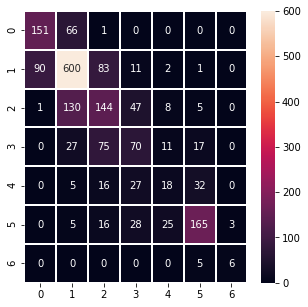

In [113]:
# Visualiza a matriz de confusão 
#   - colunas: faixas PREDITAS
#   - linhas : faixas REAIS 
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matriz_confusao, linewidths=1, annot=True, ax=ax, fmt='g')

Parece que o modelo está acertando bem as faixas (diagonal da matriz), porém:
- Quando o apto pertence à Faixa 1, ele joga 66 como Faixa 2
- Quando o apto pertence à Faixa 2, ele acerta muitos (600), mas tende a confundir alguns como faixa 1 (90) ou faixa 3 (83)
- Assim sucessivamente